In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Nuskaitom duomenis

In [3]:
from src.shared.json_tools import load_json_long
from paths import DATA_DIR

records = load_json_long(DATA_DIR / 'test/test.json')
        
# Labels for the 'content' field
content_labels = [
    'e_1',
    'e_2',
    'e_3',
    'e_4',
    'e_5',
    'e_6',
    'e_7',
    'e_8',
    'e_9',
    'e_10',
    '5_min_1',
    '5_min_2',
    '5_min_3',
    '5_min_4',
    '5_min_5',
    '5_min_6',
    '5_min_7',
    '5_min_8',
    '5_min_9',
    '5_min_10',
    'thirty_sec_log_count',
    'thirty_sec_unique_pids',
    '30_sec_1',
    '30_sec_2',
    '30_sec_3',
    '30_sec_4',
    '30_sec_5',
    '30_sec_6',
    '30_sec_7',
    '30_sec_8',
    '30_sec_9',
    '30_sec_10',
]

# Build DataFrame
rows = []
for record in records:
    row = {'id': record['id'], 'target': record['target']}
    row.update(dict(zip(content_labels, record['content'])))
    rows.append(row)

df = pd.DataFrame(rows)

### Subalansuojam klases

In [4]:
df_0 = df[df['target'] == 0].sample(n=55, random_state=42)
df_1 = df[df['target'] == 1]
df = pd.concat([df_0, df_1], ignore_index=True)

### boxplotai

/tmp/ipykernel_305491/4139974210.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=df, palette=palette)


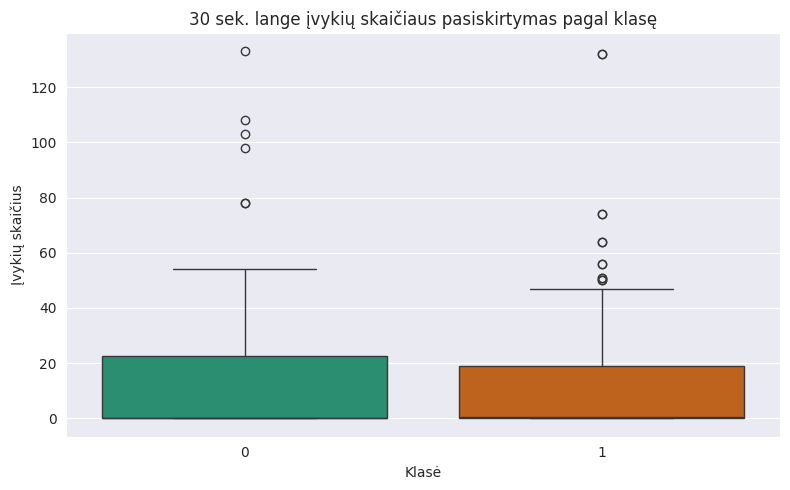

/tmp/ipykernel_305491/4139974210.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=df, palette=palette)


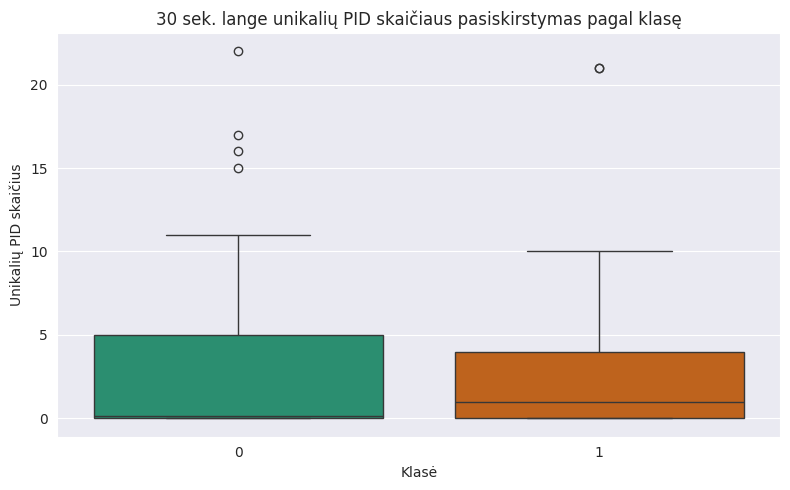

In [11]:
columns = ['thirty_sec_log_count', 'thirty_sec_unique_pids']
titles = ['30 sek. lange įvykių skaičiaus pasiskirtymas pagal klasę', 
          '30 sek. lange unikalių PID skaičiaus pasiskirstymas pagal klasę']
y_labels = ['Įvykių skaičius', 
            'Unikalių PID skaičius']
palette = "Dark2"

# Create two separate plots
for i, column in enumerate(columns):
    # Create a new figure for each plot
    plt.figure(figsize=(8, 5))
    
    # Create the boxplot
    sns.boxplot(x='target', y=column, data=df, palette=palette)
    
    # Set titles and labels
    plt.title(titles[i])
    plt.xlabel('Klasė')
    plt.ylabel(y_labels[i])
    
    # Optional: Adjust layout
    plt.tight_layout()
    
    # Show the plot (or you can save it)
    plt.show()

### five min pairplot

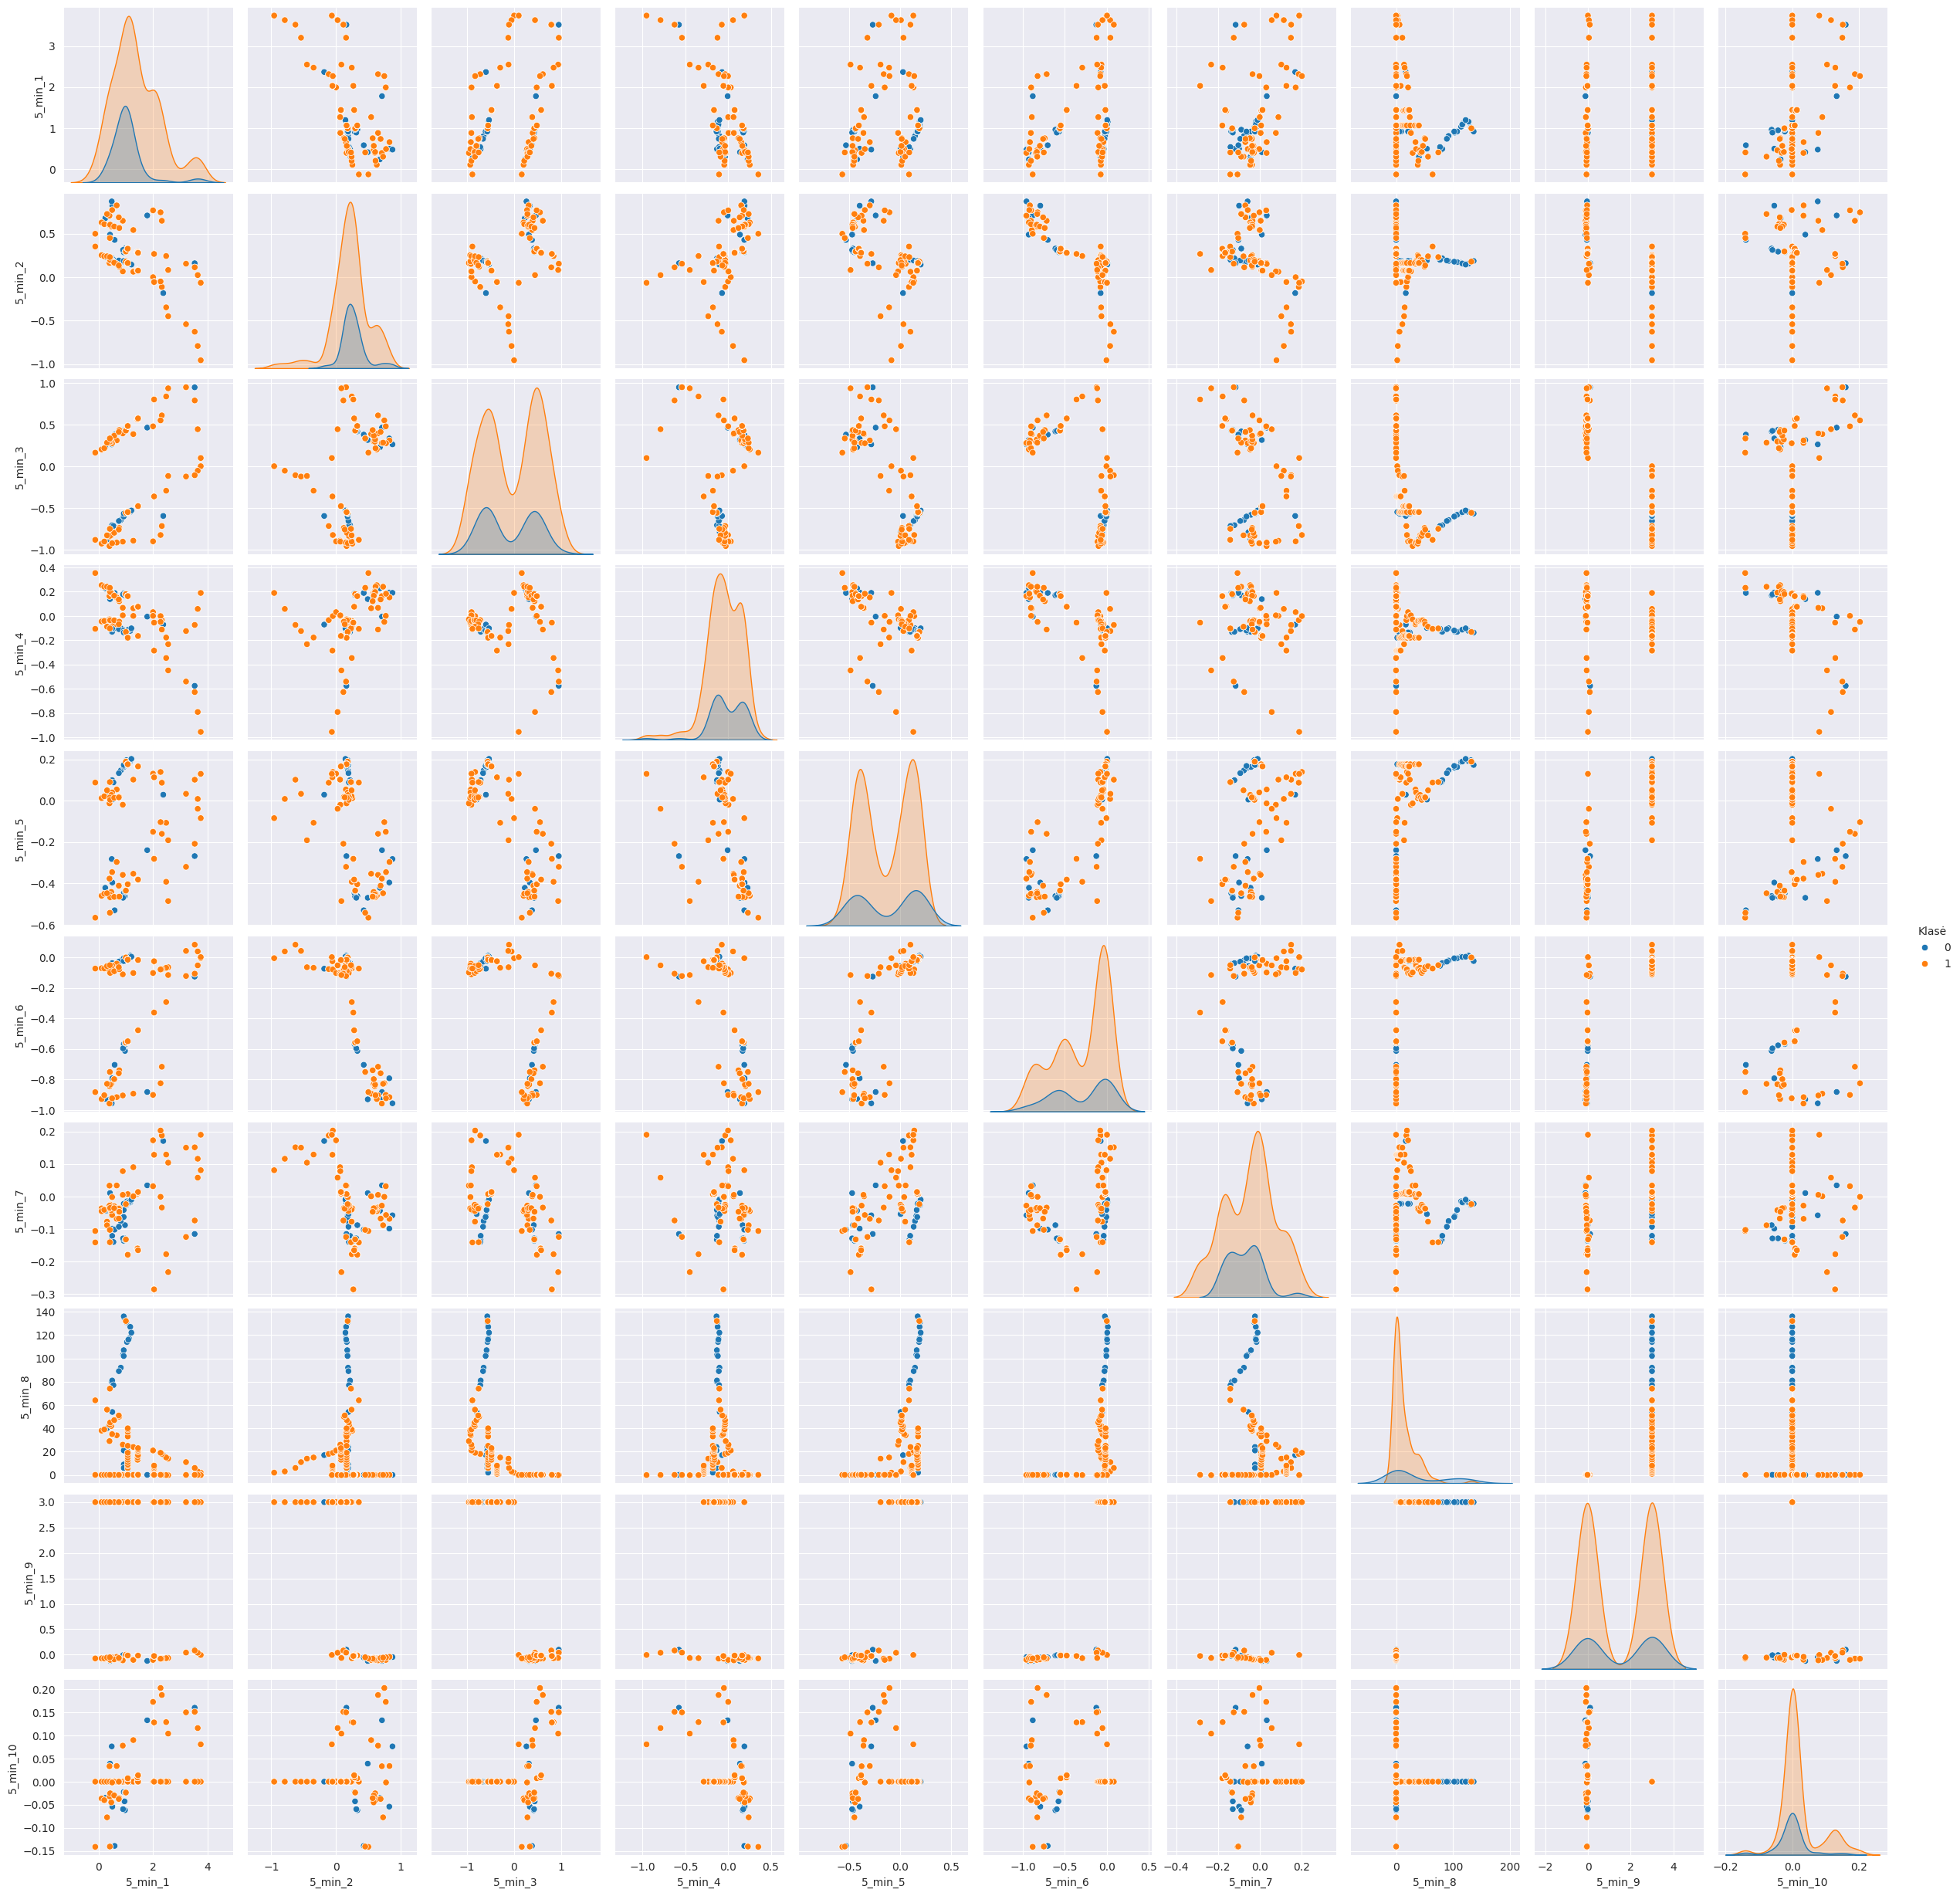

In [7]:
g = sns.pairplot(df[[
    '5_min_1',
    '5_min_2',
    '5_min_3',
    '5_min_4',
    '5_min_5',
    '5_min_6',
    '5_min_7',
    '5_min_8',
    '5_min_9',
    '5_min_10', 
    'target']], 
    hue='target')

# Update the legend title
g._legend.set_title('Klasė')
plt.show()

### thirty sec pairplot

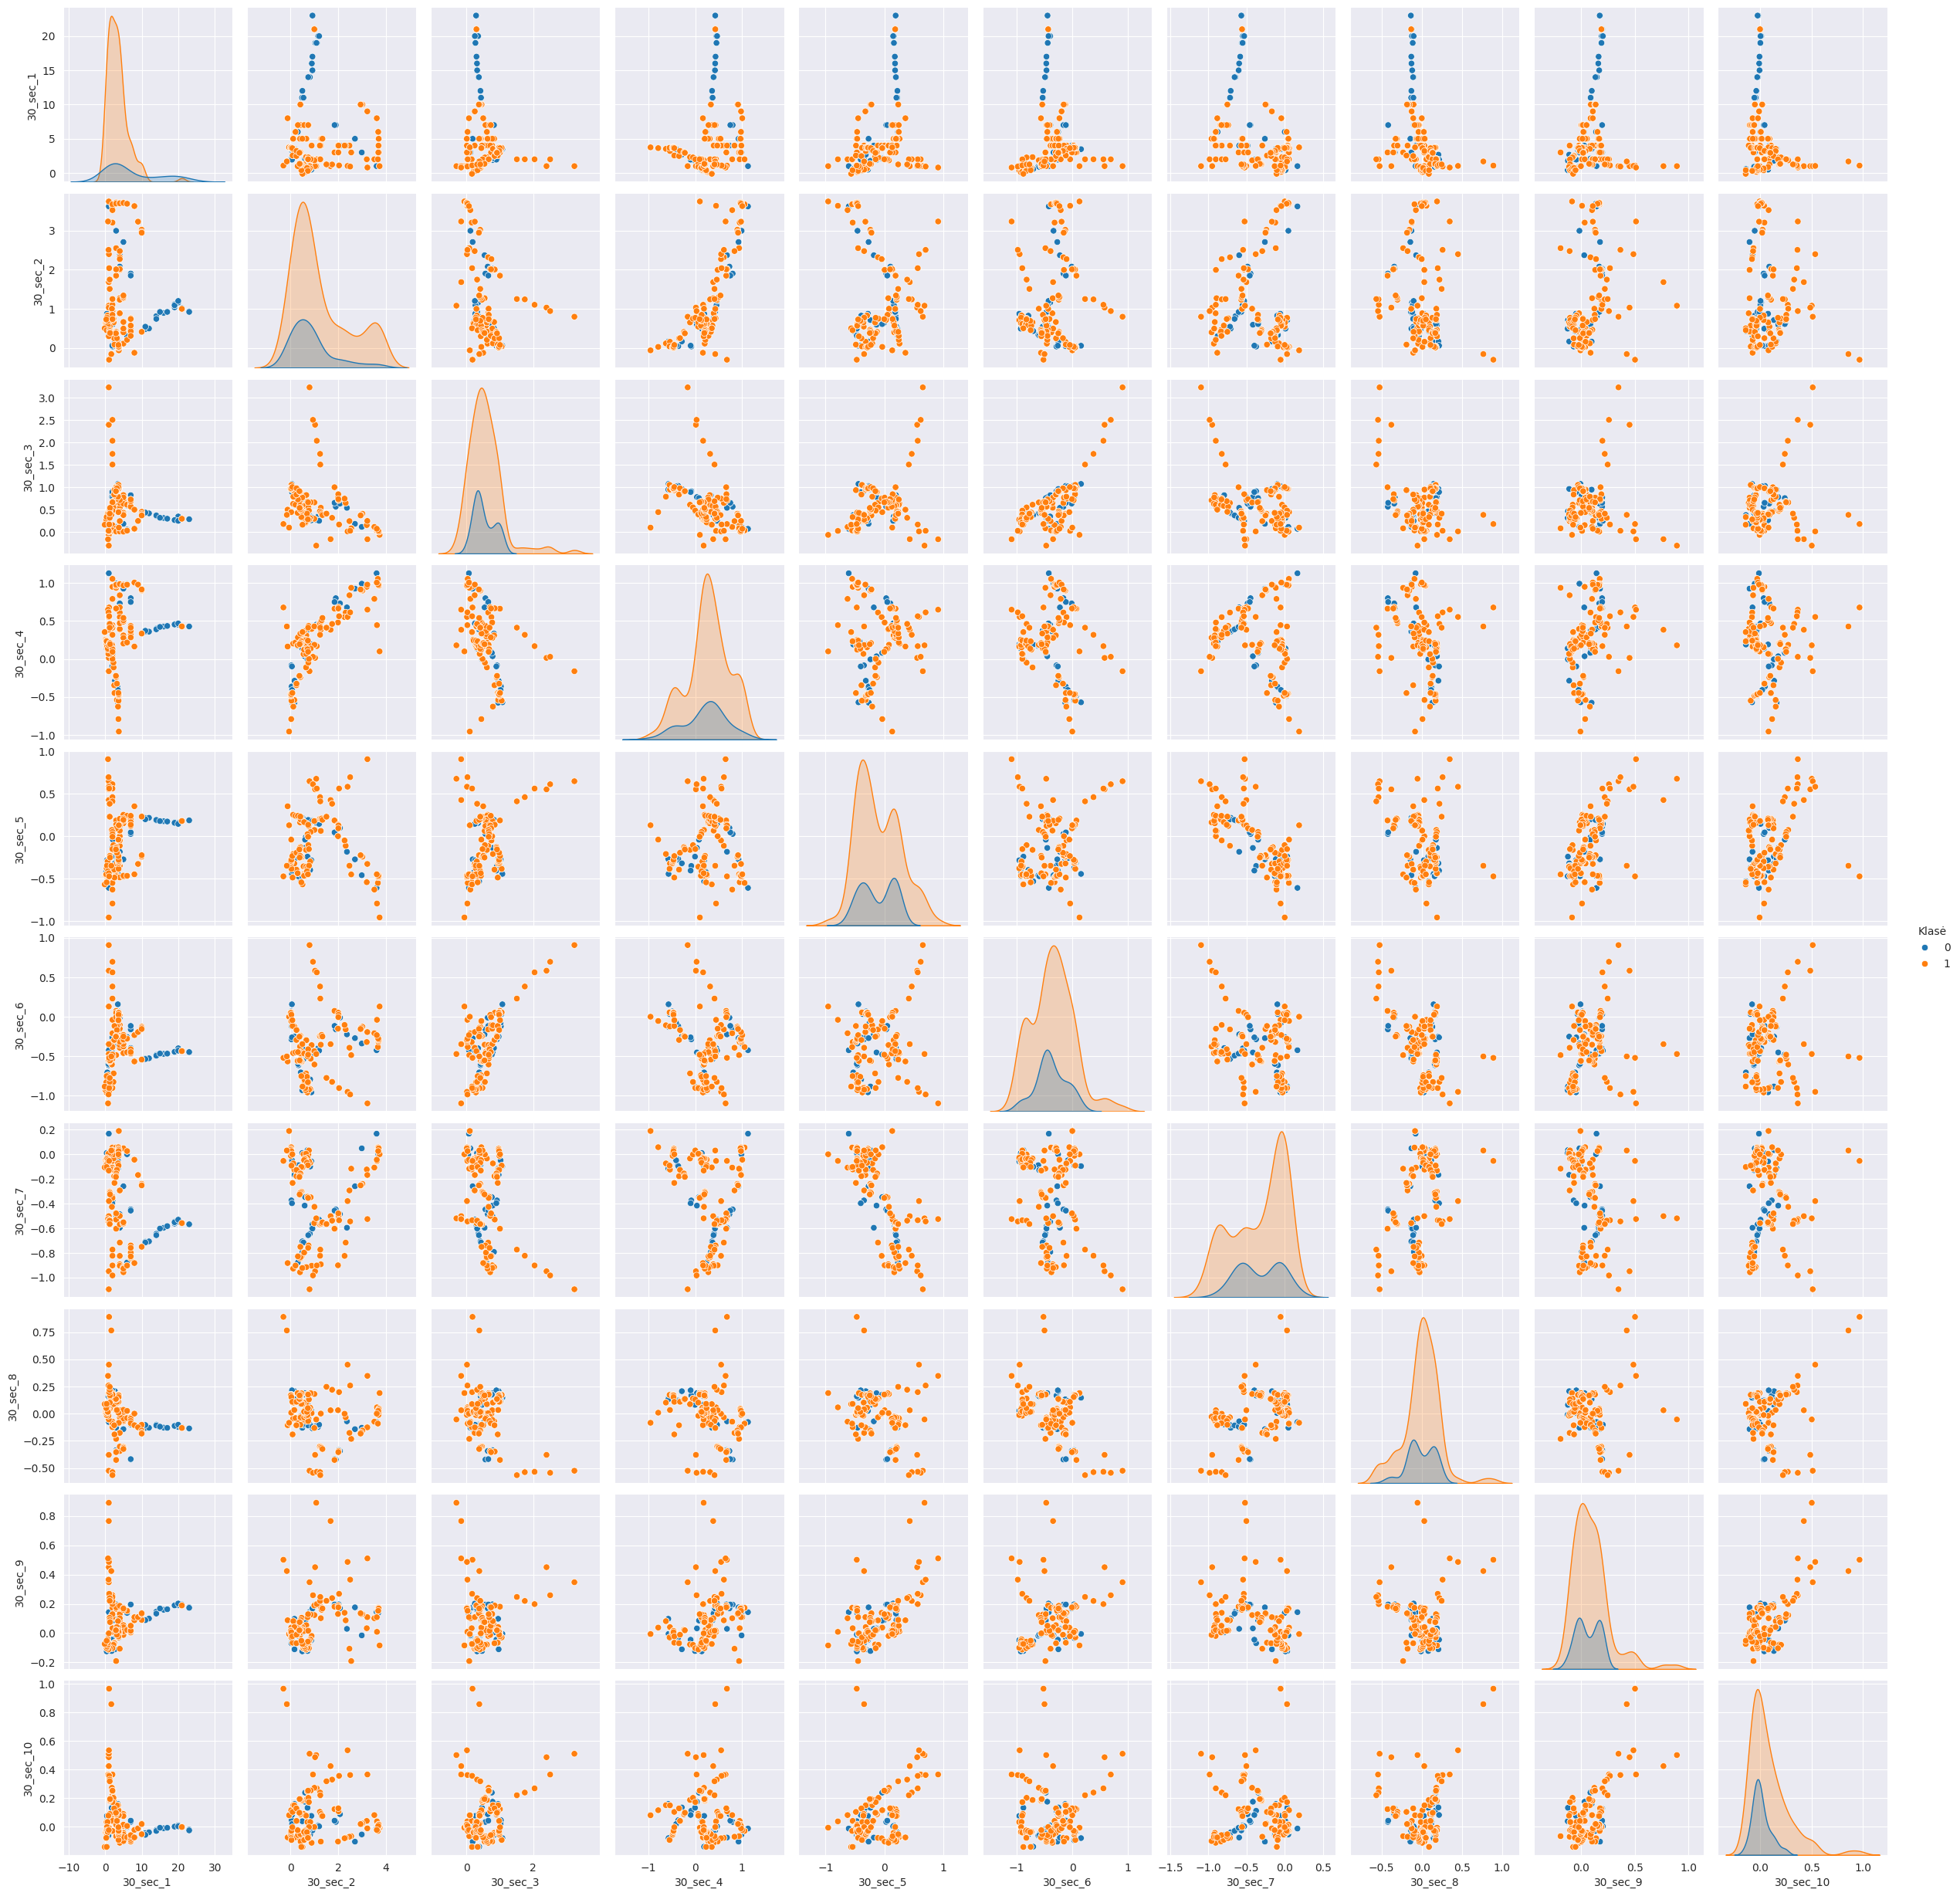

In [9]:
g = sns.pairplot(df[[
    '30_sec_1',
    '30_sec_2',
    '30_sec_3',
    '30_sec_4',
    '30_sec_5',
    '30_sec_6',
    '30_sec_7',
    '30_sec_8',
    '30_sec_9',
    '30_sec_10',
    'target']], 
    hue='target')

# Update the legend title
g._legend.set_title('Klasė')
plt.show()

### embedding pairplot


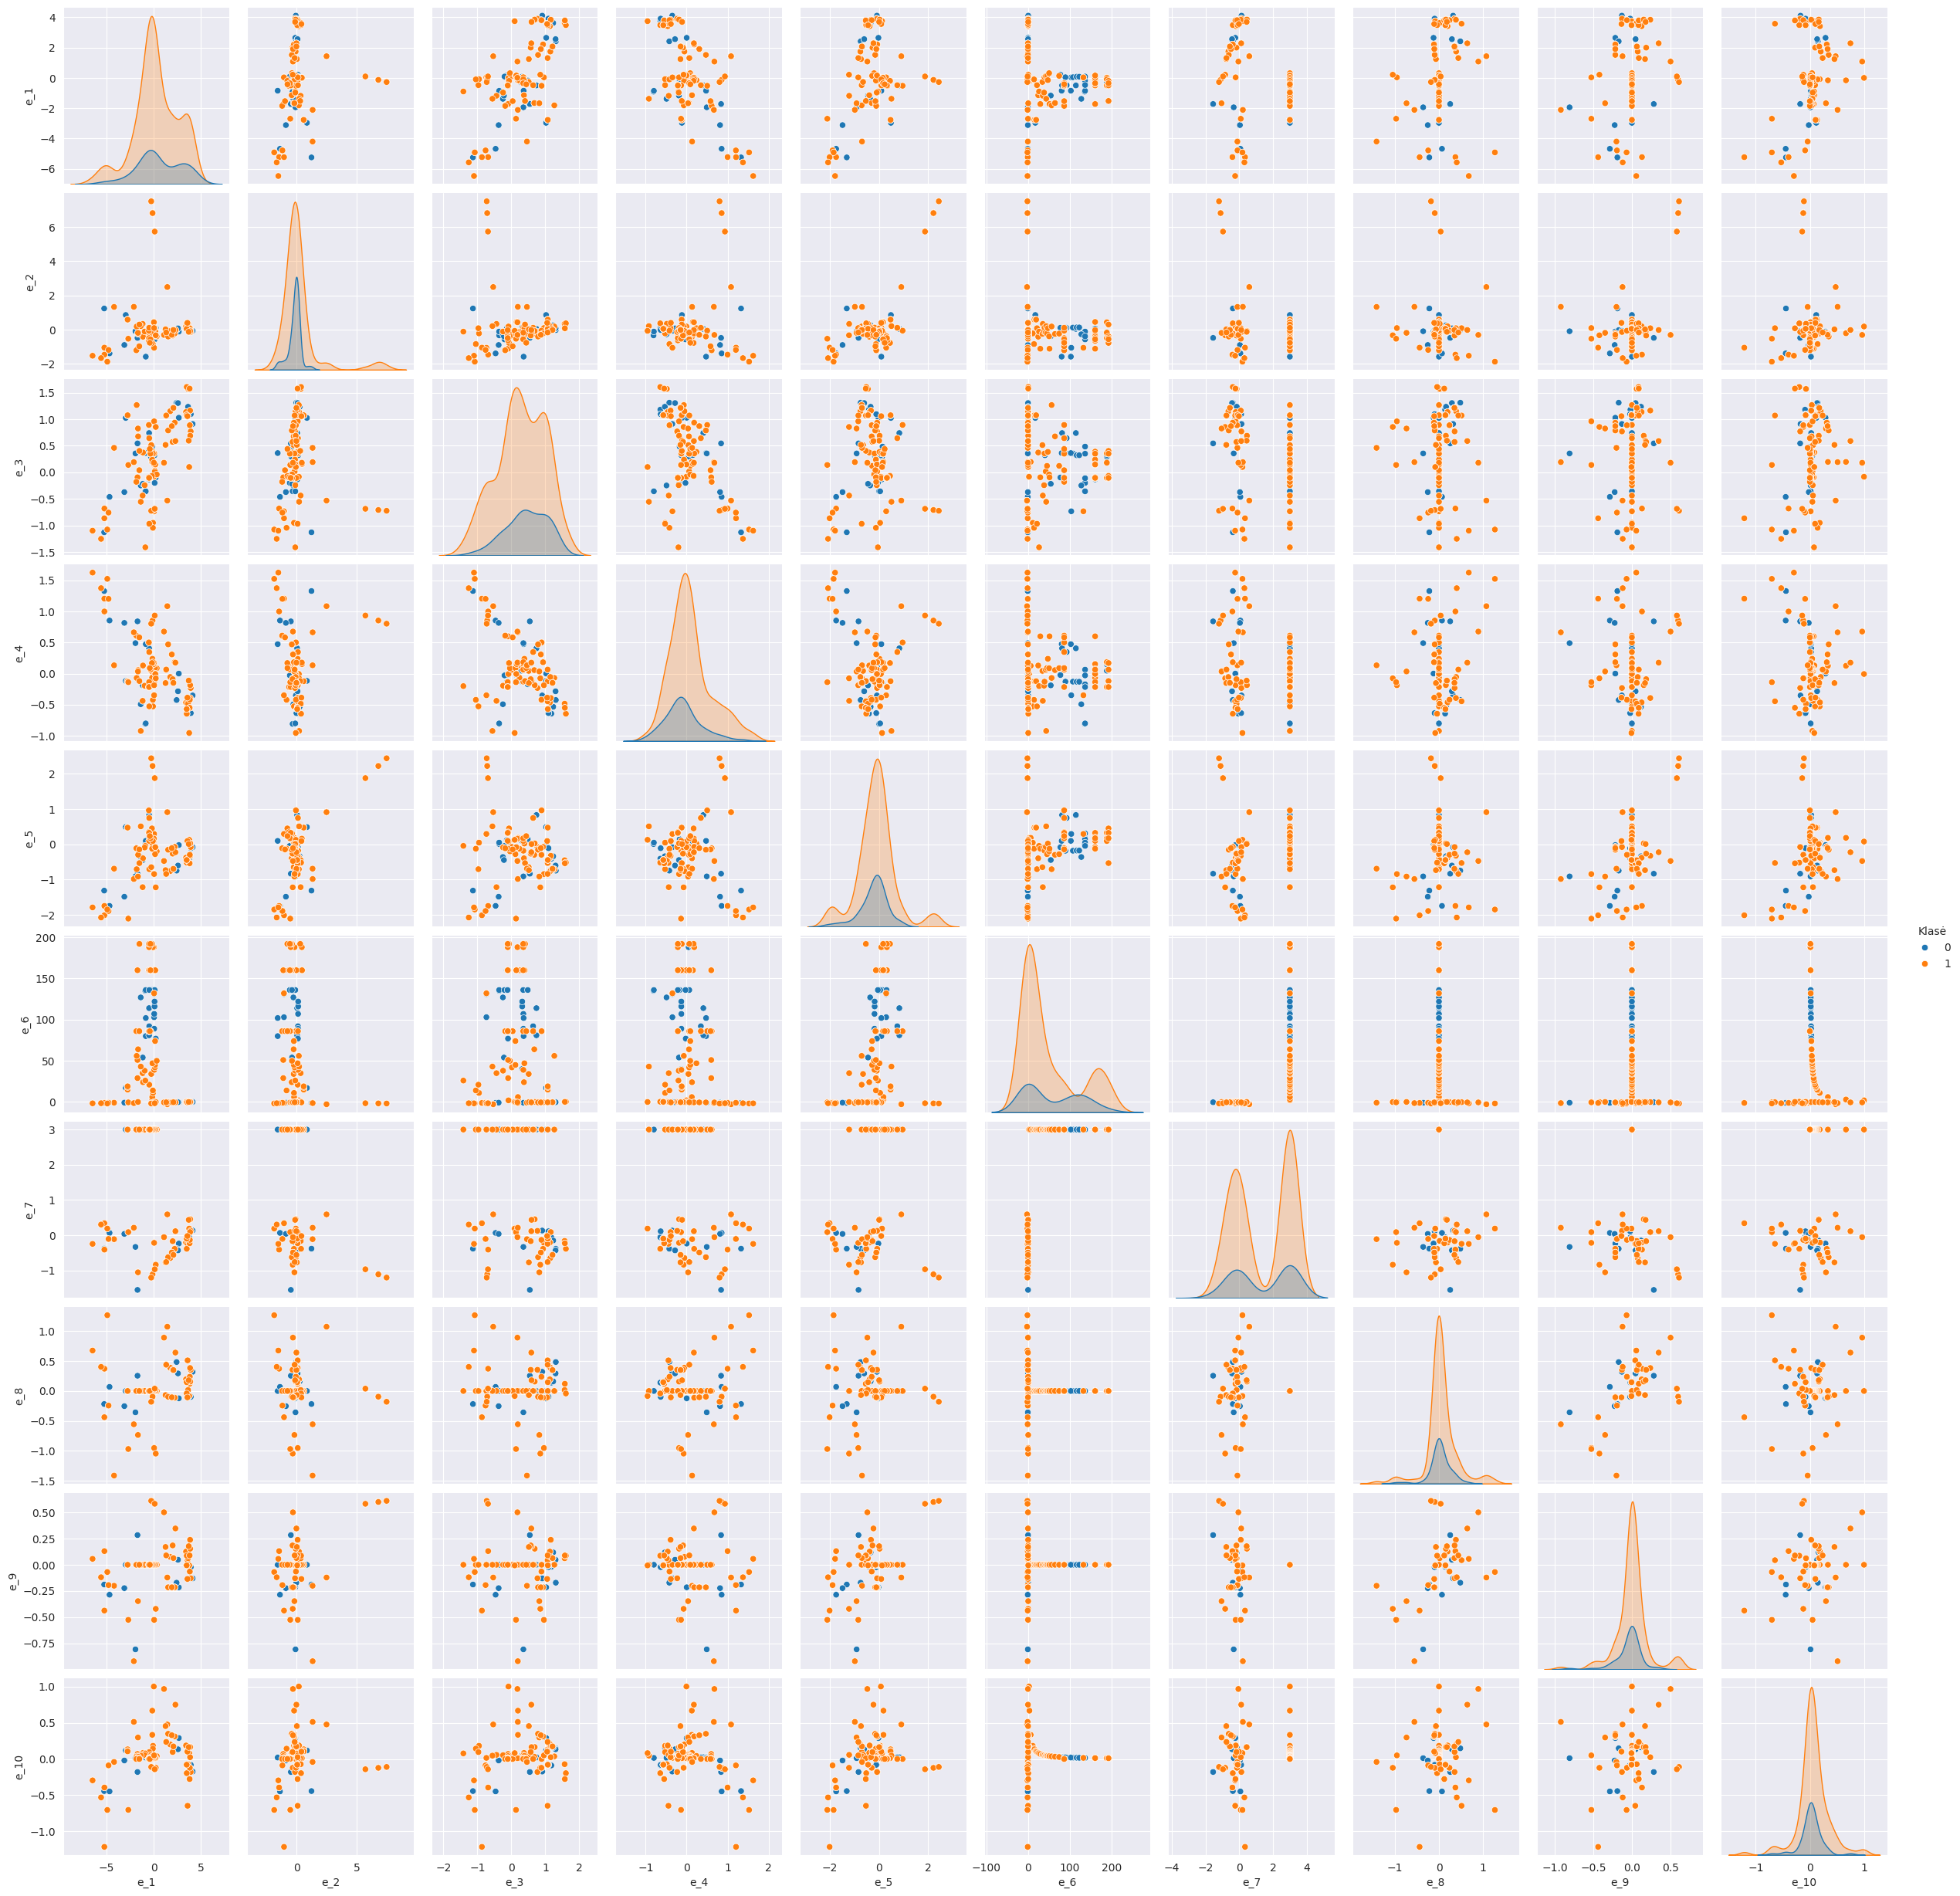

In [10]:
g = sns.pairplot(df[[
    'e_1',
    'e_2',
    'e_3',
    'e_4',
    'e_5',
    'e_6',
    'e_7',
    'e_8',
    'e_9',
    'e_10',
    'target']], 
    hue='target')

# Update the legend title
g._legend.set_title('Klasė')
plt.show()